## Exploratory Data Analysis

### Purpose: eda.ipynb is provided to ease the replication of the analytics given in the paper.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import rcParams

rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['font.size'] = 8
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  

# Add the parent directory of the src folder to the system path temporarily
# The change to sys.path is only for the current running instance of the notebook.
# This will allow the .ipynb file to import Python modules from another directories.
sys.path.append(os.path.abspath("../src"))

from dynamics import *
from simul import *
from utils import *
from optimize import *

# Get parent directory to access to config.yaml file.
path = os.getcwd()
pardir = os.path.abspath(os.path.join(path, os.pardir)) # gets parent directory

config_file = "configs/config.yaml" # Bring config.yaml file.
base_config = load_config(os.path.join(pardir,config_file)) # the parameter is the name (and the path if the file isn't in the current working directory) of the file.

### The config.yaml has parameter information of how simulation data will be generated and preprocessed.

### In this notebook, we will plot the phase portrait of three dynamical systems: cubic nonlinear dynamics, undamped pendulum, and undamped Duffing system.

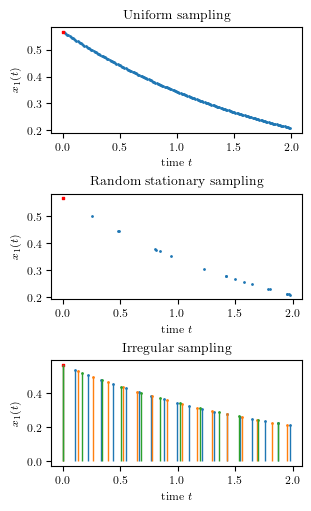

In [2]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")
        #ax.legend(loc="lower left", fontsize = 7)
    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)
    
# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("NL_ODE_seed_12.png", dpi=650, bbox_inches='tight')
plt.show()

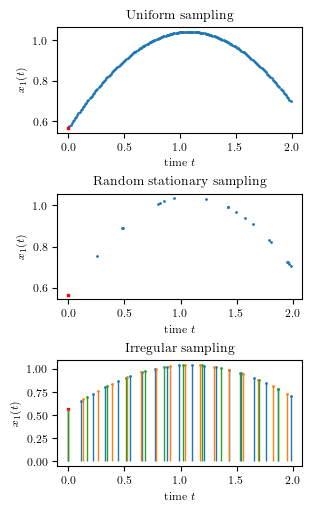

In [3]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])


# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")

    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("Pendulum_seed12.png", dpi=650, bbox_inches='tight')
plt.show()

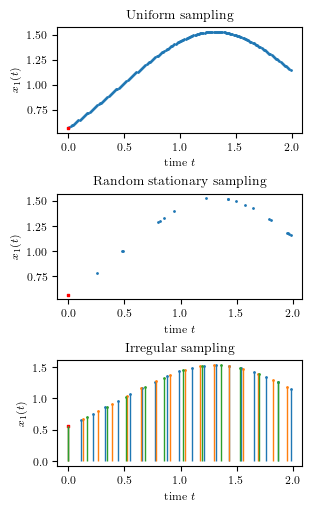

In [4]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")
        #ax.legend(loc="upper right", fontsize = 7)
    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("Duffing_seed12.png", dpi=650, bbox_inches='tight')
plt.show()

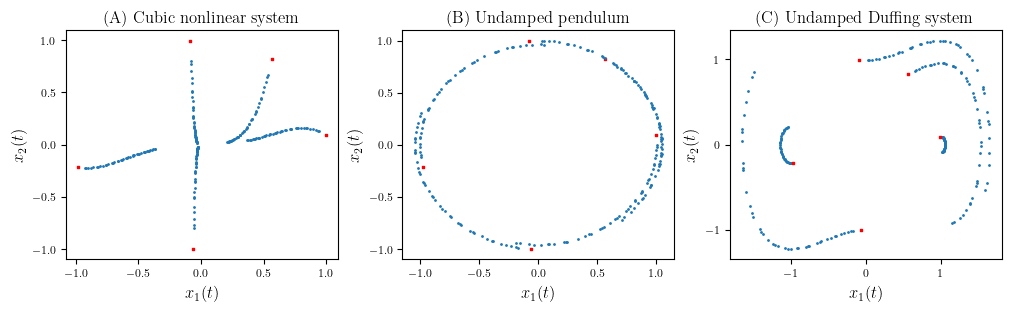

In [5]:
# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation_cubic = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])
irregular_observation_pendulum = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])
irregular_observation_duffing = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

observation_list = [irregular_observation_cubic[0], irregular_observation_pendulum[0], irregular_observation_duffing[0]]
fig_label = ["(A) Cubic nonlinear system","(B) Undamped pendulum"," (C) Undamped Duffing system"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    for num in range(base_config["params_synthetic_data"]['NUM_TRAJECTORY']):
        ax.scatter(x=temp_data[num][:,0], y=temp_data[num][:,1], s=1, c="tab:blue", alpha=1)
        ax.scatter(temp_data[num][0,0],temp_data[num][0,1], s=3, color='red', marker="s")
        ax.locator_params(axis='x', nbins=5)  # Specify 4 ticks on the x-axis
        ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
        ax.set_title(f"{fig_label[i]}",fontsize=12)
        ax.set_xlabel("$x_1(t)$", fontsize=12)
        ax.set_ylabel("$x_2(t)$", fontsize=12)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='Observations', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
#fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("PP_viz.png", dpi=650, bbox_inches='tight')
plt.show()

### Unwrapped preprocessing function and optimization process

In [7]:
import pysindy as ps # import pysindy package to validate the preprocessing procedure

In [6]:
base_config["params_synthetic_data"]["randomness"] = True
observation_pendulum = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])
libraries = []
libraries.append(ps.PolynomialLibrary(degree=4, include_bias=False))
libraries.append(ps.FourierLibrary(n_frequencies=1, include_sin=True, include_cos=True))
observables_function = ps.ConcatLibrary(libraries)

current_observable_list, one_step_forward_observable_list, time_diff_list = [], [], []

for i in range(5):
    temp_observable = observables_function.fit_transform(observation_pendulum[0][i])
    current_observable_list.append(temp_observable[:-1])
    one_step_forward_observable_list.append(temp_observable[1:])
    time_diff_list.append(np.diff(observation_pendulum[1][i]))

current_observable = np.concatenate(current_observable_list, axis=0)
one_step_forward_observable = np.concatenate(one_step_forward_observable_list, axis=0)
observation_time_diff = np.concatenate(time_diff_list, axis=0)

print(current_observable.shape, one_step_forward_observable.shape, observation_time_diff.shape)

(96, 18) (96, 18) (96,)


Example: Searching a true eigen-pair with partial minimization approach.

In [7]:
loss_function = construct_loss_function(current_observable,one_step_forward_observable,observation_time_diff)
coefficient_ls = []
eigenvalue_ls =[1e-4, 5.060000e-05, 1e-6, 1e-7, 0]
for mu in eigenvalue_ls:
    cov_matrix = loss_function(mu)
    coefficient_ls.append(np.round(partial_minimization_in_eigenfunction(cov_matrix)[1],3))
terms = observables_function.get_feature_names(["x_1","x_2"])
terms = [f"${term}(t)$"for term in terms]
learned_function_dataframe = pd.DataFrame(np.stack(coefficient_ls, axis=0), index=eigenvalue_ls, columns=terms,dtype=float)
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
latex_df = learned_function_dataframe.to_latex(index=True, escape=False, caption='tb',float_format="%.3f")
print(latex_df)

\begin{table}
\caption{tb}
\begin{tabular}{lrrrrrrr}
\toprule
 & $x_1^2(t)$ & $x_2^2(t)$ & $x_1^4(t)$ & $x_1^2 x_2^2(t)$ & $x_2^4(t)$ & $cos(1 x_1)(t)$ & $cos(1 x_2)(t)$ \\
\midrule
0.000100 & 0.095 & 0.605 & -0.003 & 0.012 & -0.005 & -0.738 & 0.283 \\
0.000051 & 0.096 & 0.605 & -0.003 & 0.012 & -0.005 & -0.738 & 0.282 \\
0.000001 & -0.000 & -0.448 & -0.000 & -0.000 & -0.000 & 0.894 & -0.002 \\
0.000000 & 0.000 & -0.447 & -0.000 & 0.000 & -0.000 & 0.895 & 0.001 \\
0.000000 & -0.000 & -0.447 & 0.000 & -0.000 & 0.000 & 0.894 & -0.000 \\
\bottomrule
\end{tabular}
\end{table}



### Unwrapped run_eDMD experiment

In [8]:
base_config["params_synthetic_data"]["randomness"] = True
train_data_cubic, train_time = generate_synthetic_data(Cubic_Nonlinear_2D_ODE, base_config["params_synthetic_data"])

trajectory_interpolated_cubic = []
for i in range(len(train_data_cubic)): # Iterate over the nubmer of trajectory
    
    state1 = train_data_cubic[i][:,0] 
    state2 = train_data_cubic[i][:,1]
    timestamp = train_time[i]

    spl_state1 = CubicSpline(timestamp,state1)
    spl_state2 = CubicSpline(timestamp,state2)

    new_timestamp = np.arange(0, base_config["params_synthetic_data"]["TIME_SPAN"], step=0.01)
    new_state1 = spl_state1(new_timestamp)
    new_state2 = spl_state2(new_timestamp)

    interpolated_states = np.stack([new_state1, new_state2],axis=1)

    trajectory_interpolated_cubic.append(interpolated_states)

libraries = []
libraries.append(ps.PolynomialLibrary(degree=3, include_bias=False))
observables_function = ps.ConcatLibrary(libraries)

current_observable_list, one_step_forward_observable_list = [], []

for i in range(base_config["params_synthetic_data"]["NUM_TRAJECTORY"]):
    temp_observable = observables_function.fit_transform(trajectory_interpolated_cubic[i])
    current_observable_list.append(temp_observable[:-1])
    one_step_forward_observable_list.append(temp_observable[1:])

current_observable = np.concatenate(current_observable_list, axis=0)
one_step_forward_observable = np.concatenate(one_step_forward_observable_list, axis=0)

G = (1/len(current_observable) * (current_observable.T @ current_observable))
A = (1/len(current_observable) * (current_observable.T @ one_step_forward_observable))
K = np.linalg.pinv(G) @ A # K is a transpose of approximated Koopman operator.
val, vec = np.linalg.eigh(K) # standard eigenvectors give Koopman eigenfunctions.

In [9]:
temp_eigenvalue_ls = np.round(np.log(val)/0.01,3)
coefficient_ls = np.round(vec, 3)

terms = observables_function.get_feature_names(["x_1","x_2"])
terms = [f"${term}(t)$"for term in terms]
temp_dataframe = pd.DataFrame(coefficient_ls.T, index=temp_eigenvalue_ls, columns=terms, dtype=float)

learned_function_dataframe = temp_dataframe.loc[[-2.418, -1, -0.5 ],:]
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
latex_df = learned_function_dataframe.to_latex(index=True, escape=False, caption='tb',float_format="%.3f")
print(latex_df)

\begin{table}
\caption{tb}
\begin{tabular}{lrrrrrrrr}
\toprule
 & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $x_1^3(t)$ & $x_1^2 x_2(t)$ & $x_1 x_2^2(t)$ \\
\midrule
-2.418000 & -0.000 & 0.813 & -0.003 & 0.033 & 0.030 & -0.570 & -0.099 & 0.043 \\
-1.000000 & 0.000 & -0.011 & -1.000 & 0.002 & 0.000 & -0.010 & -0.002 & 0.000 \\
-0.500000 & 1.000 & -0.000 & 0.000 & 0.000 & 0.000 & -0.000 & -0.000 & 0.000 \\
\bottomrule
\end{tabular}
\end{table}



In [10]:
base_config["params_synthetic_data"]["randomness"] = True
train_data_pendulum, train_time = generate_synthetic_data(Pendulum, base_config["params_synthetic_data"])

trajectory_interpolated_pendulum = []
for i in range(len(train_data_pendulum)): # Iterate over the nubmer of trajectory
    
    state1 = train_data_pendulum[i][:,0] 
    state2 = train_data_pendulum[i][:,1]
    timestamp = train_time[i]

    spl_state1 = CubicSpline(timestamp,state1)
    spl_state2 = CubicSpline(timestamp,state2)

    new_timestamp = np.arange(0, base_config["params_synthetic_data"]["TIME_SPAN"], step=0.01)
    new_state1 = spl_state1(new_timestamp)
    new_state2 = spl_state2(new_timestamp)

    interpolated_states = np.stack([new_state1, new_state2],axis=1)

    trajectory_interpolated_pendulum.append(interpolated_states)

libraries = []
libraries.append(ps.PolynomialLibrary(degree=2, include_bias=False))
libraries.append(ps.FourierLibrary(n_frequencies=1, include_sin=True, include_cos=True))
observables_function = ps.ConcatLibrary(libraries)

current_observable_list, one_step_forward_observable_list = [], []

for i in range(base_config["params_synthetic_data"]["NUM_TRAJECTORY"]):
    temp_observable = observables_function.fit_transform(trajectory_interpolated_pendulum[i])
    current_observable_list.append(temp_observable[:-1])
    one_step_forward_observable_list.append(temp_observable[1:])

current_observable = np.concatenate(current_observable_list, axis=0)
one_step_forward_observable = np.concatenate(one_step_forward_observable_list, axis=0)

G = (1/len(current_observable) * (current_observable.T @ current_observable))
A = (1/len(current_observable) * (current_observable.T @ one_step_forward_observable))
K = np.linalg.pinv(G) @ A # K is a transpose of approximated Koopman operator.
val, vec = np.linalg.eigh(K) # standard eigenvectors give Koopman eigenfunctions.

In [11]:
temp_eigenvalue_ls = np.round(np.log(val)/0.01,3)
coefficient_ls = np.round(vec, 3)

terms = observables_function.get_feature_names(["x_1","x_2"])
terms = [f"${term}(t)$"for term in terms]
temp_dataframe = pd.DataFrame(coefficient_ls.T, index=temp_eigenvalue_ls, columns=terms, dtype=float)

learned_function_dataframe = temp_dataframe.loc[[-1.241, -0.964, 0.939],:]
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
latex_df = learned_function_dataframe.to_latex(index=True, escape=False, caption='tb',float_format="%.3f")
print(latex_df)

\begin{table}
\caption{tb}
\begin{tabular}{lrrrrrrrrr}
\toprule
 & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $sin(1 x_1)(t)$ & $cos(1 x_1)(t)$ & $sin(1 x_2)(t)$ & $cos(1 x_2)(t)$ \\
\midrule
-1.241000 & 0.017 & -0.022 & -0.786 & 0.492 & -0.361 & -0.011 & -0.070 & -0.002 & -0.066 \\
-0.964000 & -0.702 & 0.673 & -0.019 & 0.008 & -0.014 & -0.073 & -0.014 & -0.221 & -0.011 \\
0.939000 & -0.706 & -0.666 & 0.012 & 0.006 & -0.011 & -0.061 & 0.000 & 0.233 & 0.005 \\
\bottomrule
\end{tabular}
\end{table}



In [12]:
base_config["params_synthetic_data"]["randomness"] = True
train_data_duffing, train_time = generate_synthetic_data(Duffing_System, base_config["params_synthetic_data"])

trajectory_interpolated_duffing = []
for i in range(len(train_data_duffing)): # Iterate over the nubmer of trajectory
    
    state1 = train_data_duffing[i][:,0] 
    state2 = train_data_duffing[i][:,1]
    timestamp = train_time[i]

    spl_state1 = CubicSpline(timestamp,state1)
    spl_state2 = CubicSpline(timestamp,state2)

    new_timestamp = np.arange(0, base_config["params_synthetic_data"]["TIME_SPAN"], step=0.01)
    new_state1 = spl_state1(new_timestamp)
    new_state2 = spl_state2(new_timestamp)

    interpolated_states = np.stack([new_state1, new_state2],axis=1)

    trajectory_interpolated_duffing.append(interpolated_states)

libraries = []
libraries.append(ps.PolynomialLibrary(degree=4, include_bias=False))
observables_function = ps.ConcatLibrary(libraries)

current_observable_list, one_step_forward_observable_list = [], []

for i in range(base_config["params_synthetic_data"]["NUM_TRAJECTORY"]):
    temp_observable = observables_function.fit_transform(trajectory_interpolated_duffing[i])
    current_observable_list.append(temp_observable[:-1])
    one_step_forward_observable_list.append(temp_observable[1:])

current_observable = np.concatenate(current_observable_list, axis=0)
one_step_forward_observable = np.concatenate(one_step_forward_observable_list, axis=0)

G = (1/len(current_observable) * (current_observable.T @ current_observable))
A = (1/len(current_observable) * (current_observable.T @ one_step_forward_observable))
K = np.linalg.pinv(G) @ A # K is a transpose of approximated Koopman operator.
val, vec = np.linalg.eigh(K) # standard eigenvectors give Koopman eigenfunctions.

In [13]:
temp_eigenvalue_ls = np.round(np.log(val)/0.01,3)
coefficient_ls = np.round(vec, 3)

terms = observables_function.get_feature_names(["x_1","x_2"])
terms = [f"${term}(t)$"for term in terms]
temp_dataframe = pd.DataFrame(coefficient_ls.T, index=temp_eigenvalue_ls, columns=terms, dtype=float)

learned_function_dataframe = temp_dataframe.loc[[-0.311, -0.003, 0.961],:]
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
latex_df = learned_function_dataframe.to_latex(index=True, escape=False, caption='tb',float_format="%.3f")
print(latex_df)

\begin{table}
\caption{tb}
\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
 & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $x_1^3(t)$ & $x_1^2 x_2(t)$ & $x_1 x_2^2(t)$ & $x_2^3(t)$ & $x_1^4(t)$ & $x_1^3 x_2(t)$ & $x_1^2 x_2^2(t)$ & $x_1 x_2^3(t)$ & $x_2^4(t)$ \\
\midrule
-0.311000 & -0.500 & 0.156 & 0.107 & -0.016 & -0.075 & -0.453 & 0.084 & 0.470 & -0.374 & 0.136 & -0.010 & -0.267 & 0.212 & -0.017 \\
-0.003000 & 0.021 & 0.001 & 0.210 & 0.001 & -0.872 & 0.017 & 0.000 & -0.011 & 0.006 & -0.441 & -0.001 & 0.006 & -0.003 & -0.001 \\
0.961000 & -0.298 & -0.287 & -0.394 & -0.191 & 0.137 & -0.018 & -0.103 & -0.009 & -0.213 & -0.473 & -0.178 & 0.439 & 0.215 & -0.258 \\
\bottomrule
\end{tabular}
\end{table}



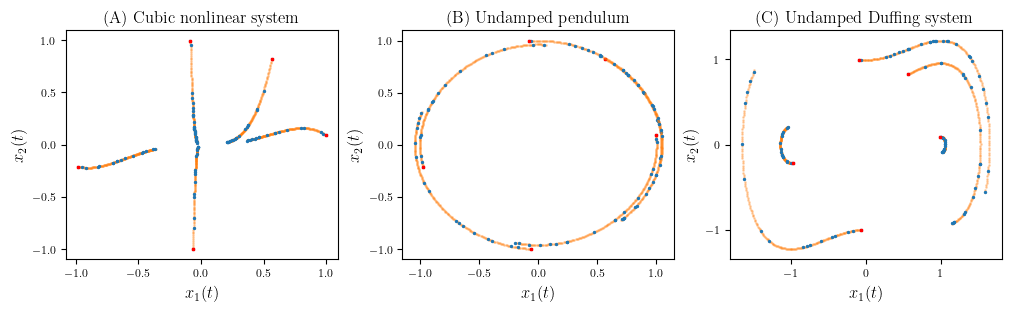

In [ ]:
data_list = [train_data_cubic, train_data_pendulum, train_data_duffing]
interpolated_data_list = [trajectory_interpolated_cubic, trajectory_interpolated_pendulum, trajectory_interpolated_duffing]
fig_label = ["(A) Cubic nonlinear system","(B) Undamped pendulum"," (C) Undamped Duffing system"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = data_list[i]
    temp_interpolated = interpolated_data_list[i]
    for num in range(base_config["params_synthetic_data"]['NUM_TRAJECTORY']):
        ax.scatter(x=temp_interpolated[num][:,0], y=temp_interpolated[num][:,1], s=1, c="tab:orange", alpha=0.3)
        ax.scatter(x=temp_data[num][:,0], y=temp_data[num][:,1], s=2, c="tab:blue", alpha=1)
        ax.scatter(temp_data[num][0,0],temp_data[num][0,1], s=4, color='red', marker="s")
        ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
        ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
        ax.set_title(f"{fig_label[i]}",fontsize=12)
        ax.set_xlabel("$x_1(t)$", fontsize=12)
        ax.set_ylabel("$x_2(t)$", fontsize=12)

line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='Observations', linestyle='None')
line1 = mlines.Line2D([], [], color='tab:orange', marker='o', label='Interpolation', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

plt.savefig("interpolated_PP_viz.png", dpi=650, bbox_inches='tight')
plt.show()